# BrowserUnit Experimentation Notebook

Currently in-development **BrowserUnit** is a simple python library class for running Selenium Webdriver tests inside UnitTest functions. It is intended to speed the automation of simple and repetitive browser actions.

This notebook is a collection of experimental methods to develop a minimal set of functions for quickly checking for element content, element presence, switching pages, parsing sitemaps, etc.


In [1]:
import rcf_lib as R
import unittest
import os
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options as C_Options
from selenium.webdriver.firefox.options import Options as FF_Options
import time
import sys
from colorama import init as cinit
cinit() # Filters ANSI escape sequences and inserts Win32 calls.

In [2]:
x = "Hello, world!"

In [3]:
print(x)

Hello, world!


In [4]:
if( os.name == 'nt' ):
    FF_BINARY_PATH = "webdrivers/geckodriver.exe" # Assuming notebook was opened from py/
    CHROME_BINARY_PATH = "webdrivers/chromedriver.exe"
else:
    FF_BINARY_PATH = "webdrivers/geckodriver" # Assuming notebook was opened from py/
    CHROME_BINARY_PATH = "webdrivers/chromedriver"

def FF_DRIVER():
    firefox_options = FF_Options()
    return webdriver.Firefox(executable_path=FF_BINARY_PATH,options=firefox_options)

def C_DRIVER():
    chrome_options = C_Options()
    chrome_options.add_argument("--window-size=200,")
    chrome_options.add_argument("disable-infobars")
    chrome_options.add_argument("--disable-notifications")
    return webdriver.Chrome(executable_path=CHROME_BINARY_PATH,options=chrome_options)

At this point, `FF_DRIVER()` will open a FireFox window for testing, and `CHROME_DRIVER()` will open a Chrome window for testing. Both functions return the **driver** that is used for maniuplating the page. We'll attempt to open and manipulate the FireFox driver first. A window should open after this command is run.

In [5]:
# Test ChromeDriver
c_driver = C_DRIVER()
c_driver.get("http://catb.org/jargon/html/index.html")
print("Jargon" in c_driver.title) # Will print "True" if page loads successfully.
print(c_driver.title)
c_driver.close()

True
The Jargon File


In [6]:
# Test GeckoDriver
ff_driver = FF_DRIVER()
ff_driver.get("http://catb.org/jargon/html/index.html")
print("Jargon" in ff_driver.title) # Will print "True" if page loads successfully.
print(ff_driver.title)
ff_driver.close()

True
The Jargon File


### Requirements for the BrowserUnit Class:

1. Provide an abstraction layer for easy testing of website components.
2. Provide a system for defining the composition of a website's html so components can be isolated and verified as present or with certain properties.
3. Provide methods to check for elements and text on the page, in such a way that a script can be quickly constructed for testing against a requirement.
4. Provide a framework to write test cases for each requirement defined in a separate document of test cases.

### Stretch Functionality:

1. Pull and process sitemap using beautifulsoup , requests.

# Implementation Plan

In order to execute a series of pre-determined functions in order with variables, I will add the functions to a queue and execute them synchronously. I don't necessarily want to implement threading yet, but if I implement this correctly, it shouldn't be hard.

In [7]:
class Bottler:
    """Attempt to execute a stored array of functions."""
    def __init__(self):
        self.bottlingQueue = []

    def addTest(self, printme):
        def bottledTest():
            print( printme )
        self.bottlingQueue.append(bottledTest)

    def executeTests(self):
        for test in self.bottlingQueue:
            test()

b = Bottler()
b.addTest("One")
b.addTest("Two")
b.addTest("Three")
b.executeTests()

One
Two
Three


In [8]:
b.addTest("Four")
b.executeTests()

One
Two
Three
Four


`Bottler` demonstrates that functions can be stored as objects, stored in an array and called sequentially.

In [9]:
class BrowserUnitQueue:
    """Used for storing and running """
    def __init__(self):
        self.test_queue = []
    
    def add_unit(self, x):
        self.test_queue.append(x)
    
    def list_units(self):
        print("")
        for x in self.test_queue:
            print(str(x))

In [10]:
class BrowserUnit:
    """Used for building a single unit-test."""
    def __init__(self):
        self.ffd = FF_DRIVER()
        self.cd = CC_DRIVER()
        self.functionQueue = []
    
    def assertTitle(self, string):
        def bottledAssertTitle(string):
            self.functionQueue.append(bottledAssertTitle)

In [11]:
x = print
x("lol") # Oh, damn. Functions are objects.

BROWSER_UNIT_QUEUE = BrowserUnitQueue()
BROWSER_UNIT_QUEUE.add_unit("This ought to be a unittest obj.")
BROWSER_UNIT_QUEUE.list_units()

lol

This ought to be a unittest obj.


Populating the interactive namespace from numpy and matplotlib


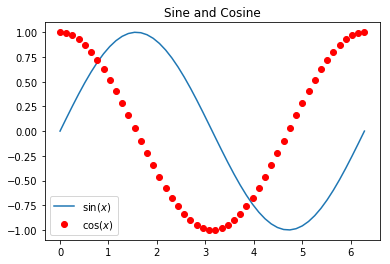

In [12]:
%pylab inline
x = linspace(0, 2*pi)
plot(x, sin(x), label=r'$\sin(x)$')
plot(x, cos(x), 'ro', label=r'$\cos(x)$')
title(r'Sine and Cosine')
legend() # Wow, this graph is pretty magical.